In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment

In [2]:
# Reading the dataset to the python environment
data=pd.read_excel('iris (1).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Checking the shape of the dataset
data.shape

(150, 5)

In [4]:
# Checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
# Checking for unique values in each column
data.nunique()

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [6]:
# Checking some more detailed information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do necessary pre-processing steps

### Filling missing values

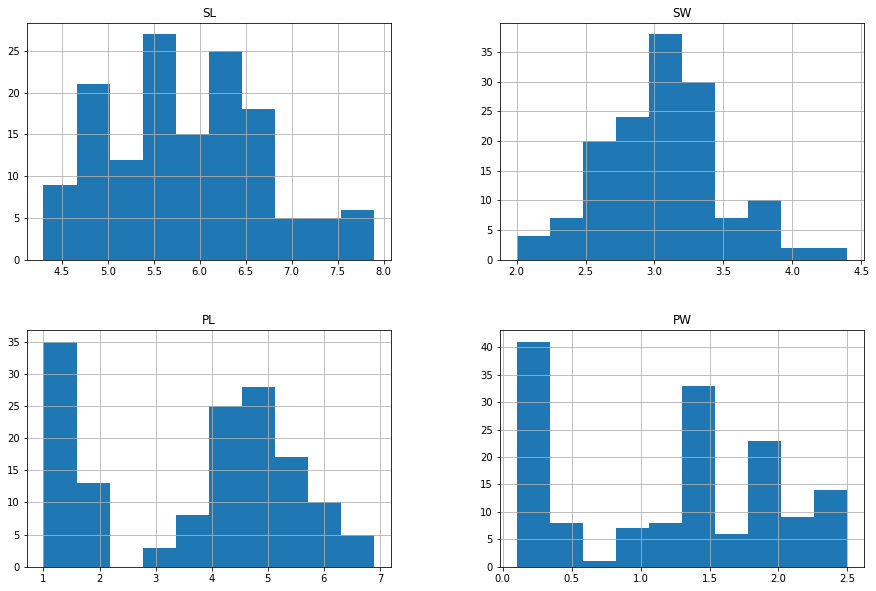

In [7]:
# Plotting the frequency graph
freqgraph = data.select_dtypes(include=['float64'])
freqgraph.hist(figsize=(15,10))
plt.show()

In [8]:
data = data.fillna(method='ffill')

In [9]:
# Checking for null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Outlier detection

Text(0.5, 1.0, 'Box plot of Sepal Length')

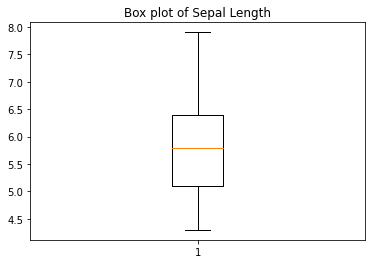

In [10]:
# Plotting the Box plot of SL
plt.boxplot(data['SL'])
plt.title('Box plot of Sepal Length')

No outlier is detected for sepal length.

Text(0.5, 1.0, 'Box plot of Sepal width')

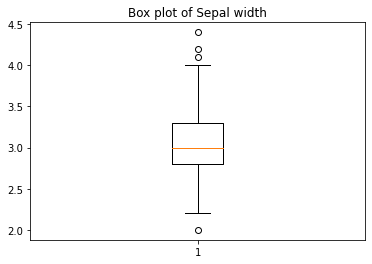

In [11]:
# Plotting the Box plot of SW
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal width')

In [12]:
# Calculating quantiles
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')

# Calculating lower limit and upper limit
IQR = Q3-Q1

low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [13]:
# Calculating outliers using for loop
outlier = []
for x in data['SW']:
    if ((x>up_limit) or (x<low_limit)):
        outlier.append(x)
        
outlier

[4.4, 4.1, 4.2, 2.0]

In [14]:
# Getting the index locations of outliers
ind1 = data['SW']>up_limit
index = data.loc[ind1].index
index

Int64Index([15, 32, 33], dtype='int64')

In [15]:
# Dropping outliers
data.drop([ 15, 32, 33], inplace=True)

Text(0.5, 1.0, 'Box plot of Sepal width')

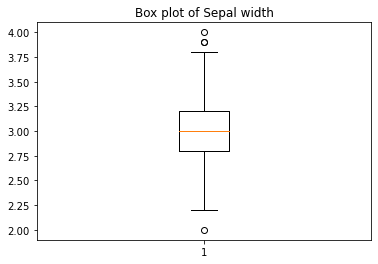

In [16]:
# Plotting the Box plot of SW
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal width')

Text(0.5, 1.0, 'Box plot of Petal length')

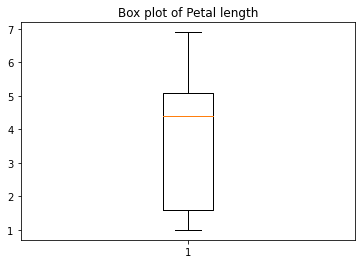

In [17]:
# Plotting the Box plot of PL
plt.boxplot(data['PL'])
plt.title('Box plot of Petal length')

No outlier is detected for petal length.

Text(0.5, 1.0, 'Box plot of Petal width')

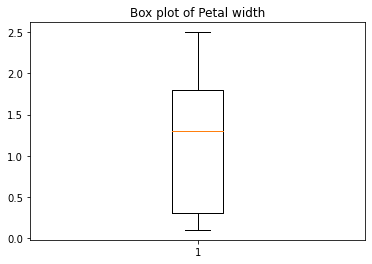

In [18]:
# Plotting the Box plot of PW
plt.boxplot(data['PW'])
plt.title('Box plot of Petal width')

No outlier is detected for petal width.

### One hot encoding

In [19]:
# Checking for unique values in the column 'Classification'
data.Classification.nunique()

3

In [20]:
# Converting categorical data into dummy
data = pd.get_dummies(data)
data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.9,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


<AxesSubplot:>

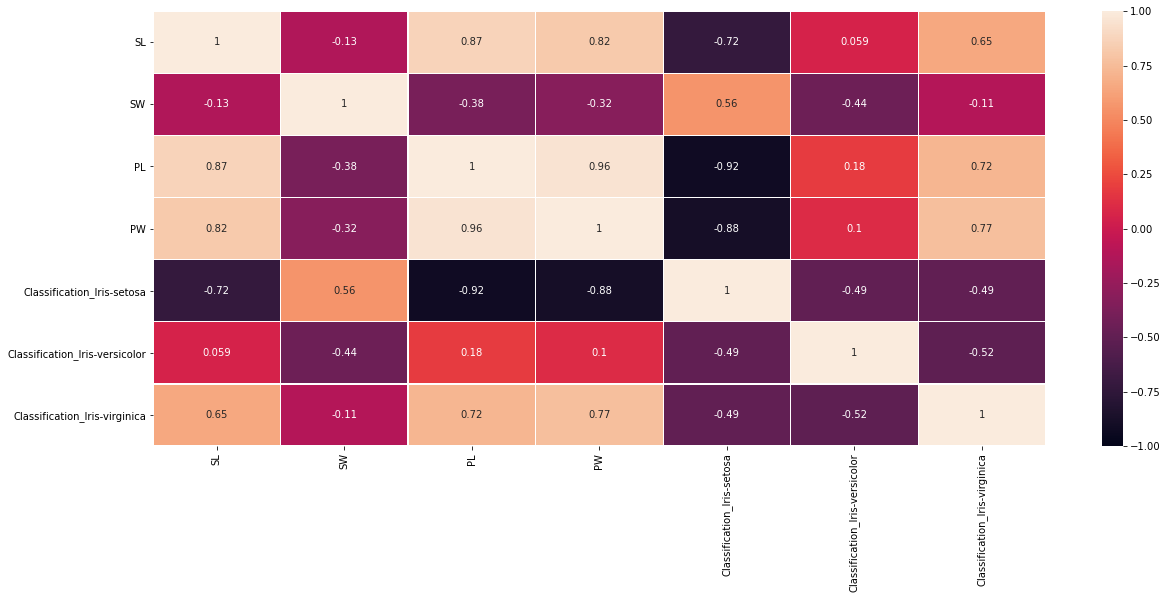

In [21]:
# Plotting the correlation matrix
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-1.0, vmax=1.0, annot=True, linewidths=0.2)

In [22]:
# Seperating input features and target
y = data['PL']
X = data.drop('PL', axis=1)

In [23]:
# Importing training test split from SciKit-Learn
from sklearn.model_selection import train_test_split
# Setting up training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Importing linear model from SciKit-Learn
from sklearn import linear_model
# Training model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

# Calculating mean squared error
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

# Calculating R squared value
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,predictions))

MSE is: 0.08052308066798758
R squared value is : 0.9716308199450439


### Standard scaling

In [24]:
# Statistical summary of X
X.describe()

,SL,SW,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.866667,3.023810,1.218367,0.319728,0.340136,0.340136
std,0.849281,0.392801,0.757973,0.467965,0.475374,0.475374
min,4.300000,2.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,1.300000,0.000000,0.000000,0.000000
75%,6.450000,3.200000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.000000,2.500000,1.000000,1.000000,1.000000


In [25]:
# Importing preprocessing for standard scaling
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(X)

In [26]:
# Converting X into a Dataframe
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5
count,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02
mean,-7.466627e-16,3.621442e-16,-1.110223e-16,6.963440e-16,2.416812e-16,-3.172066e-16
std,1.003419e+00,1.003419e+00,1.003419e+00,1.003419e+00,1.003419e+00,1.003419e+00
min,-1.851004e+00,-2.615347e+00,-1.480515e+00,-6.855655e-01,-7.179582e-01,-7.179582e-01
25%,-9.058104e-01,-5.717271e-01,-1.215752e+00,-6.855655e-01,-7.179582e-01,-7.179582e-01
50%,-7.876612e-02,-6.082203e-02,1.080668e-01,-6.855655e-01,-7.179582e-01,-7.179582e-01
75%,6.892036e-01,4.500830e-01,7.699760e-01,1.458650e+00,1.392839e+00,1.392839e+00
max,2.402367e+00,2.493703e+00,1.696649e+00,1.458650e+00,1.392839e+00,1.392839e+00


In [27]:
# Setting up training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
# Training model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
# Calculating mean squared error
print('MSE is:',mean_squared_error(y_test,predictions))
# Calculating R squared value
print('R squared value is :', r2_score(y_test,predictions))

MSE is: 0.08052308066798744
R squared value is : 0.9716308199450439


Standard scaling does not have any effect in the data.

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

### Decision tree classifier¶

In [28]:
# Converting testing and training values datatype to integer
X_train = X_train.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [29]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# Predicting the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred = dt_model.predict(X_test)
# Printing accuracy of the model
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 0.8


In [31]:
# Counting the test value
y_test.value_counts()

1    11
4    10
5     6
3     2
6     1
Name: PL, dtype: int64

In [32]:
# Getting confusion matrix from test and prediction values
confusion_matrix(y_test, y_pred)

array([[11,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  2,  6,  2,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  1]], dtype=int64)

### SVM

#### Linear SVM

In [33]:
# Linear classifier
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
# Predicting the model
y_pred = svm_linear.predict(X_test)
# Printing accuracy of the model
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 0.8


#### Polynomial svm

In [35]:
# Polynomial classifier
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [36]:
# Predicting the model
y_pred = svm_poly.predict(X_test)
# Printing accuracy of the model
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 0.8666666666666667


#### Radial svm

In [37]:
# Radial classifier
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train, y_train)

SVC()

In [38]:
# Predicting the model
y_pred = svm_radial.predict(X_test)
# Printing accuracy of the model
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 0.8666666666666667


### Random Forest Classifier

In [39]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [40]:
# Printing accuracy of the model
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 0.8


Among Decision tree classifier, svm, and Random forest classifier; the radial svm and polynomial svm gives the highest accuracy of 86%.